# **Práctica 1: Multiarmed bandits**

### **Autores: Adrián Rubio y Carlos Ramos**

El objetivo de esta práctica es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -5 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1NNN5ZB68108zxiJWfZn6FjTrhnzKEQV3/view?usp=sharing


A continuación se descarga y muestra:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=1fbACV5f_YTPFtetTqKgV3YEnkJ0xqoKJ&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

**Base de datos:**

In [ ]:
df = pd.read_csv("./cs.csv")
df.head(3)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0


**Información sobre cada variable:**

In [ ]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Por otra parte reordenaremos aleatoriamente el dataset ya que simularemos que los clientes van contactando con nosotros sin ningún tipo de orden:

In [ ]:
df = df.iloc[np.random.permutation(len(df))]
df.head(3) # hago display de los 3 primeros clientes del dataset

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
99392,0,0.001234,69,0,1627.00000,NaN,17,0,2,0,0.0
43136,1,0.301492,65,1,1.38243,4575.0,20,0,2,1,0.0
134253,0,0.001623,62,0,4.00000,NaN,11,0,0,0,0.0


# **Entrega**

Se entregará un notebook con todo el código, gráficas y resultados comentados.

# **Tareas a realizar**

# **EJERCICIO 1**

**1- Aborda el problema con un multiarmed bandit *no contextual* (un $\epsilon$-greedy). ¿Cuál es el reward promedio al que llega tu algoritmo? ¿cómo se compara respecto a un grupo de control donde la acción escogida es siempre aleatoria? Representa la evolución del reward total, regret total y reward promedio para $\epsilon=0.1$ y $\epsilon=0.01$**




Comenzamos observando cuál es la distribución real del lso clientes que pagan y los que no pagan el crédito (morosos, no morosos). Disponemos de dos tipos de acciones(conceder credito, denegar credito) lo cual nos proporciona tres posibles rewards:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -5 si se le ofrece crédito y **no lo paga**


Calculamos el mejor reward total y el peor de acuerdo a cualquier estrategia.

In [ ]:
print('best return:', len(df.loc[df['SeriousDlqin2yrs'] == 0])) #moroso
print('worst return:', len(df.loc[df['SeriousDlqin2yrs'] == 1]) * -5) #moroso

best return: 139974
worst return: -50130


Pero que nuestra estrategia elegida es la **greedy**. Vamos a ver que cantidad de morosos/no morosos tenemos:

In [ ]:
print('Nº morosos:', len(df.loc[df['SeriousDlqin2yrs'] == 1])) #moroso
print('Nº de pagadores', len(df.loc[df['SeriousDlqin2yrs'] == 0])) #moroso

Nº morosos: 10026
Nº de pagadores 139974


Tal como vemos abajo el nº de morosos de nuestro dataset es de 10026, frente a los 139974 que si devolverán el credito concedido. De aquí podemos inferir que el procentaje de morosos es menor en comparación con la clase contraria, por lo que una solución codiciosa debería priorizar conceder  siempre más creditos que denegar creditos, ya que el reward de la acción conceder será siempre mayor.

Vamos a ver la distribución de las rewards según las acciones(bandits):

In [ ]:
#Calculamos la distribución de rewards para cada acciónque obtendríamos con una estrategía greedy
                                                      
def get_distribution(a):
  if a == 1: #se ofrece credito
    aux = []
    for i in df['SeriousDlqin2yrs']:
      if (i == 0): 
          aux.append(1) 
      else: 
          aux.append(-5)
    return np.array(aux)
  else:#no se concede credito:reward 0
    return np.zeros(len(df['SeriousDlqin2yrs']))

Distribución del reward de la acción 1:conceder crédito:

In [ ]:
import seaborn as sns
from scipy import stats   

def plot_density(x, x_label, title):
  ax = sns.histplot(x, kde=False, stat='density', label='samples')

  # calculate the pdf
  x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
  x_pdf = np.linspace(x0, x1, 100)
  y_pdf = stats.norm.pdf(x_pdf)

  ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf') 
  ax.set_xlabel(x_label)      
  ax.set_title(title)                                            
  ax.legend()

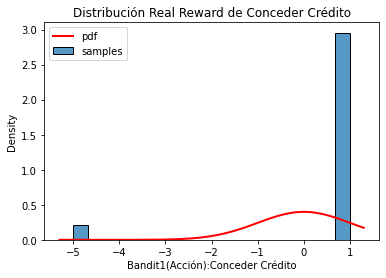

In [ ]:
x= get_distribution(1)
plot_density(x, 'Bandit1(Acción):Conceder Crédito','Distribución Real Reward de Conceder Crédito')


Distribución del reward de la acción 0: no conceder crédito: ya la sabemos **siempre es 0**

Sin embargo la distribución real se supone que no la conocemos, por ello definimos la clase Bandit basandonos en el código proporcionado en los apuntes de la asignatura, se establecera un maximo de tiradas(para asegurar en caso de que no converja), los premios que sigue la distribución explicada anteriormente.

In [ ]:
# Simulación de cliente a conceder credito
class Bandit:
    def __init__(self, std): # se inicializa bandit
        # se generan todas las futuras salidas de Bandit
        self.maxpulls = 150000
        # premios con distribución 
        self.futurepulls = get_distribution(std)
        #la media de los premios con distribución 
        self.mean = np.mean(self.futurepulls)
        # la primera salida
        self.n = 0 
    
    # se acciona bandit arm
    def pull(self): 
        aux = self.futurepulls[self.n]
        self.n = self.n + 1
        
        if self.n == self.maxpulls:
            self.n = 0

        return aux

Probamos la clase bandit y comprobamos que tiene el comporamiento esperado.

In [ ]:
bandit0 = Bandit(0)
print('futurepulls:', bandit0.futurepulls)
print('n:', bandit0.n)
bandit0.pull()
print('n:', bandit0.n)

futurepulls: [0. 0. 0. ... 0. 0. 0.]
n: 0
n: 1


In [ ]:
bandit1 = Bandit(1)
print('futurepulls:', bandit0.futurepulls)
print('n:', bandit0.n)
bandit0.pull()
print('n:', bandit0.n)

futurepulls: [0. 0. 0. ... 0. 0. 0.]
n: 1
n: 2


Sacamos por pantalla la distribución de premios con dos bandit que realizan 15000 tiradas cada uno, el primer bandit sigue una distribuicion de una politica de denegar credito, el segundo bandit por contra tiene una politica de siempre conceder credito.

Tal como sospechabamos al inicio del problema, una solución codiciosa va a ser ventajosa por la gran diferencia que hay entre clientes "estables" frente a clientes "potencialmente morosos".

In [ ]:
premios0 = [bandit1.pull() for _ in range(15000)] # comprehension list
premios1 = [bandit1.pull() for _ in range(15000)] # comprehension list

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


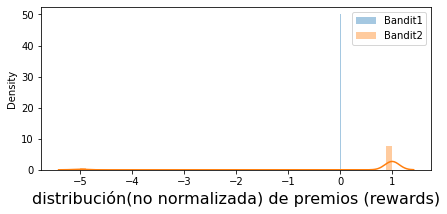

In [ ]:
N = 150000
bandit1 = Bandit(0)
bandit2 = Bandit(1)

premios1 = [bandit1.pull() for _ in range(N)]
premios2 = [bandit2.pull() for _ in range(N)]

plt.figure(figsize=(7,3))
sns.distplot(premios1, label='Bandit1')
sns.distplot(premios2, label='Bandit2')
plt.xlabel('distribución(no normalizada) de premios (rewards)', fontsize=16)
plt.legend();

Tomamos la clase del agente vista en clase y la utilizamos para realizar estimaciones de Bandit.

In [ ]:
class estimacion_Bandit: # estimación del valor Q del Bandit
    def __init__(self):
        # se inicializan todas las estimaciones a 0
        self.suma_premios = 0
        self.N = 0
        self.mean = 0
        
    def update(self, x): # ahora obtengo premio x en la máquina
        self.suma_premios += x
        self.N += 1
        self.mean = self.suma_premios / self.N # estimación de Q

In [ ]:
estimacion = estimacion_Bandit()
print('ini: ', estimacion.suma_premios, estimacion.N, estimacion.mean)
estimacion.update(10)
print('after 10: ', estimacion.suma_premios, estimacion.N, estimacion.mean)

ini:  0 0 0
after 10:  10 1 10.0


Establecemos una estrategia de control: la estrategia aleatoria:

In [ ]:
# Estrategia básica:
# - Primero se explora aleatoriamente
# - Cuando se ha explorado aleatoriamente, se procede a elegir siempre el bandit con mejor
#   estadística en la fase de exploración

def run_experiment_basic(bandits, N_total, N_explore, vis=True, reward = False):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    
    for i in range(N_total):
        if i < N_explore: # fase de exploración (elijo una máquina al azar)
            j = np.random.choice(2) #solo dos acciones
        else: # fase de explotación: elijo la máquina con mayor mean (Q estimada)
            j = np.argmax([y.mean for y in estimated_bandits])
        
        x = bandits[j].pull() # Echo moneda a máquina j y observo premio (reward) x
        estimated_bandits[j].update(x) # Actualizo estimación de máquina j
        # para dibujar luego:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards) #sumatorio de todas las recompensas
    cumulative_average = cumulative_reward / (np.arange(N) + 1) #promedio de recompensas

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        if (reward):
          plt.plot(x, cumulative_reward, label='cumulative_reward')
          plt.title('basic cumulative reward, N_explore={}'.format(N_explore), fontsize=16)
        else:
          plt.plot(x, cumulative_average, label='average reward')
          plt.title('basic cumulative avarage, N_explore={}'.format(N_explore), fontsize=16)
         
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

In [ ]:
N_explore_basic = 100
total_reward_basic, average_reward_basic  = run_experiment_basic([bandit1, bandit2], N_total=N, N_explore= N_explore_basic, vis = False, reward = True) 

In [ ]:
N_explore_basic = 100
total_reward_basic, average_reward_basic  = run_experiment_basic([bandit1, bandit2], N_total=N, N_explore= N_explore_basic, vis = False, reward = False) 

Una vez que hemos comprobado que nuestra implementación funciona para una implementación básica, lo probamos para la implementación solicitada en el ejercicio,

Para ello también utilizaremos las clases vistas en teoria.

Establecemos una estrategia greedy(ϵ = 0).

In [ ]:
def run_experiment_egreedy(bandits, epsilon, N_total, N_explore, vis=True, reward = False):
    estimated_bandits = [estimacion_Bandit() for _ in bandits]
    
    rewards = np.empty(N_total)
    
    for i in range(N_total):
        # epsilon greedy
        p = np.random.random() # número aleatorio entre 0 y 1 (distribución homogénea, "uniforme")
        if p < epsilon: # explorar. Ocurre el 100*epsilon % de las veces
            j = np.random.choice(2) #solo dos acciones
        else: # explotar
            j = np.argmax([b.mean for b in estimated_bandits])
        
        x = bandits[j].pull()
        estimated_bandits[j].update(x)
        # para dibujar:
        rewards[i] = x
        
    cumulative_reward  = np.cumsum(rewards) #sumatorio de todas las recompensas
    cumulative_average = cumulative_reward / (np.arange(N_total) + 1) #promedio de recompensas

    if vis:
        # plot moving average ctr
        plt.figure(figsize=(7,3))
        x = np.array(range(1,N+1))
        plt.plot(x, N*[bandits[0].mean], label='bandit 1 real mean')
        plt.plot(x, N*[bandits[1].mean], label='bandit 2 real mean')
        if (reward):
          plt.plot(x, cumulative_reward, label='cumulative_reward')
          plt.title('Cumulative_reward $\epsilon$-greedy, $\epsilon$={}'.format(epsilon), fontsize=16)

        else:
          plt.plot(x, cumulative_average, label='average reward')
          plt.title('Cumulative_average $\epsilon$-greedy, $\epsilon$={}'.format(epsilon), fontsize=16)
         
        plt.xscale('log')
        plt.legend(loc=4)
        plt.show()
    
        for i,b in enumerate(estimated_bandits):
            print('media estimada del bandit {}: {}'.format(i+1,np.round(b.mean,3)))
    
    return cumulative_reward, cumulative_average

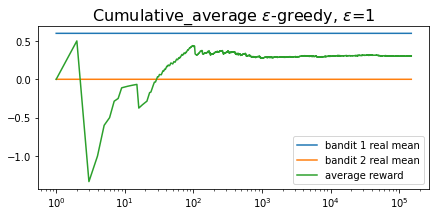

media estimada del bandit 1: 0.606
media estimada del bandit 2: 0.0






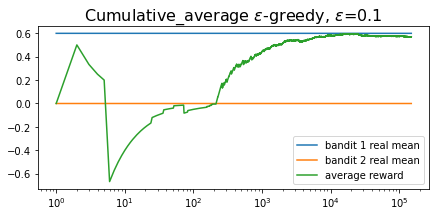

media estimada del bandit 1: 0.6
media estimada del bandit 2: 0.0






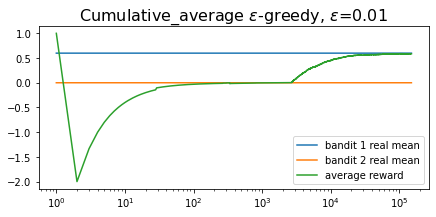

media estimada del bandit 1: 0.6
media estimada del bandit 2: 0.0






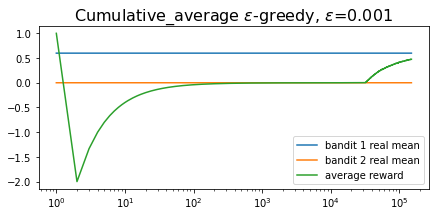

media estimada del bandit 1: 0.603
media estimada del bandit 2: 0.0






In [ ]:
epsilons = [1, 1e-1, 1e-2, 1e-3]

total_rewards = []
average_rewards = []
for e in epsilons:
    bandit1 = Bandit(1)
    bandit2 = Bandit(2)

    total_reward, average_reward  = run_experiment_egreedy([bandit1, bandit2],
                                                           epsilon=e, N_total=N, N_explore=N_explore_basic, reward = False)
    total_rewards.append(total_reward)
    average_rewards.append(average_reward)
    print("\n\n\n")

La reward acumulativa como es de esperar siempre es creciente. Cabe destacar que promediamos esta rewarda cumulativa para varias ejecuciones. , Observamos como la política greedy(ϵ = 1) se atasca en un valor subóptimo(0.6) en vez del óptimo: 1. Es por ello que empleamos la estrategia ϵ-greedy, en el que simpre hay una fase de exploración.
Observamos como para las estrategias  ϵ-greedy acavamos convergiendo al máximo, sin embargo, cunto más pequeño es el ϵ, más tardamos en converger. Tiene sentido, ya que a menor epsilon, menos veces estamos explorando.
Y el average reward va progresivamente creciendo hasta estabilizarse y tender a la media 



Vamos a ver la recompensa promedio:

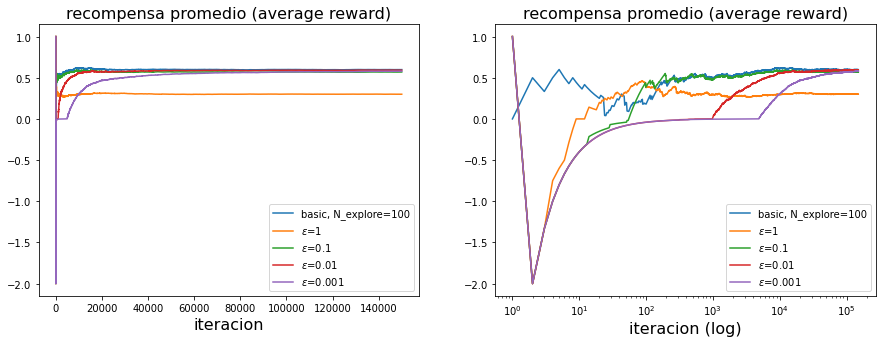

In [ ]:

plt.figure(figsize=(15,5))

# linear plot
plt.subplot(1,2,1)
x = np.array(range(1,N+1))
plt.plot(x, average_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for average_reward, e in zip(average_rewards, epsilons):
    plt.plot(x, average_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=4)
plt.xlabel('iteracion', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16)

# log scale plot
plt.subplot(1,2,2)
plt.plot(x, average_reward_basic, label='basic, N_explore={}'.format(N_explore_basic))
for average_reward, e in zip(average_rewards, epsilons):
    plt.plot(x, average_reward, label='$\epsilon$={}'.format(e))
plt.legend(loc=4)
plt.xscale('log')
plt.xlabel('iteracion (log)', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16);

Obervamos de nuevo que la estrategia greedy se queda atascada en un subóptimo. Para el resto, debido a la exploración, observamos un crecimiento logarítmico.



Pasamos a graficar los resultados:

- El valor promedio toma un valor aproximado de 0.6
- La recompensa total es siempre creciente debido a principalmente a el mayor nº de clientes "cumplidores" frente a los morosos.


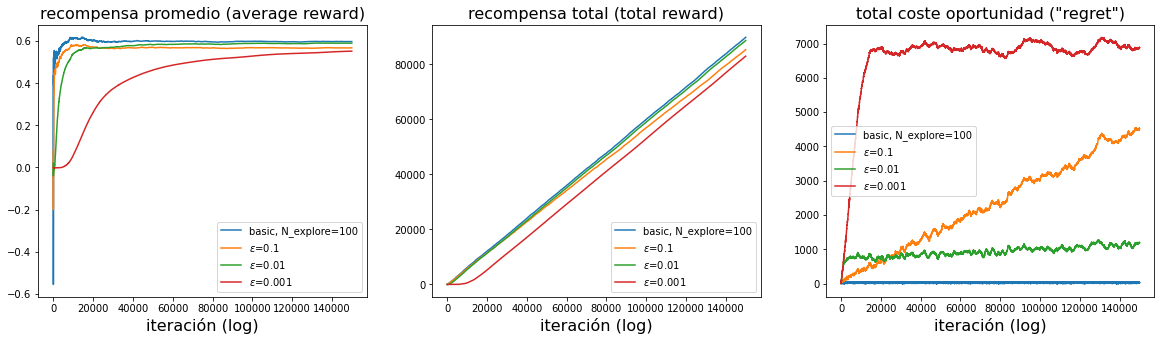

In [ ]:
plt.figure(figsize=(20,5))
x = np.array(range(1,N+1))
aux_a = average_reward_matrix.mean(axis=1)
aux_a_std = average_reward_matrix.std(axis=1)

#promedio
plt.subplot(1,3,1)
for i in range(4):
    if i == 0:
        plt.plot(x, aux_a[0], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, aux_a[i], label='$\epsilon$={}'.format(epsilons[i-1]))
plt.legend(loc=4)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('recompensa promedio (average reward)', fontsize=16)

#total
aux_t = total_reward_matrix.mean(axis=1)
aux_t_std = total_reward_matrix.std(axis=1)
plt.subplot(1,3,2)
for i in range(4):
    if i == 0:
        plt.plot(x, aux_t[0], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, aux_t[i], label='$\epsilon$={}'.format(epsilons[i-1]))

plt.legend(loc=4)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('recompensa total (total reward)', fontsize=16)


#oportunidad
plt.subplot(1,3,3)
max_m = max([0,1])
optimal_bandit = Bandit(max_m)
optimal_gains = [optimal_bandit.pull() for _ in range(N)]

for i in range(4):
    if i==0:
        plt.plot(x, np.cumsum(optimal_gains) - aux_t[i], label='basic, N_explore={}'.format(N_explore_basic))
    else:
        plt.plot(x, np.cumsum(optimal_gains) - aux_t[i], label='$\epsilon$={}'.format(epsilons[i-1]))


plt.legend(loc=0)
plt.xlabel('iteración (log)', fontsize=16)
plt.title('total coste oportunidad ("regret")', fontsize=16);



Sabemos que en escala logarítmica, el coste de oportunidad perdito tolta tiene un comportamiento lineal para las estrategias ϵ-greedy. Por facilidad visual nosotros hemos pintado el paso del tiempo en escalo logarítmica. Observamo como las estrategias que no dedican muy poco tiempo a explorar(ϵ pequeño), cada vez tienen un coste mayor cada vez, lo cual es algo malo. En cambio los que se dedican a explorar(ϵ grande y el básico), tienen un coste de oportunidad menor. Vemos como la recompensa en mayor en la estrategia básica y por tanto la oportunidad perdida menor, por lo tanto podemos afirmar que las estrategias ϵ-greedy no son una buena opción para este problema. Vamos a probar los bandidos contextuales.

# **EJERCICIO 2**

**2- Aborda el problema con un multiarmed bandit *contextual*, donde las variables de contexto son todas las columnas del dataset menos *SeriousDlqin2yrs*. ¿Cuál es el reward promedio al que llega tu algoritmo? ¿cómo se compara respecto a un grupo de control donde la acción escogida es siempre aleatoria? Representa la evolución del reward total, regret total y reward promedio.**

Lo que se espera teoricamente del contextual es un peor funcionamiento inicial en comparación al método greedy, pero un mejor funcionamiento una vez entrenado el modelo.

Al igual que en el ejercicio anterior comenzamos definiendo una clase, en esta ocación la clase cliente donde se almacena el tipo de cliente, su contexto y las posibles ganancias que puede retonar como premio. para ello nos basaremos en el código visto en teoría.

Para la clase definimos un id aleatorio que determinara la row del cliente del dataset que tomamos(de manera aleatoria), el tipo de cliente estará definido por la columna de SeriousDlqin2yrs, y será un valor que únicamente usaremos para determinar el reward de la clase dependiendo de la acción escogida. Además el cliente contrando un vector de caracteristicas que conformará su contexto, el cual incluye todos los valores del dataset a excepción del campo SeriousDlqin2yrs. 

In [ ]:
# clase para generar cliente:
class cliente():
  def __init__(self):
    self.id = np.random.randint(15000)
    self.tipo_cliente = int(df.iloc[[self.id]].loc[:, df.columns == 'SeriousDlqin2yrs'].values)
    self.contexto = np.nan_to_num(np.array(df.iloc[[self.id]].loc[:, df.columns != 'SeriousDlqin2yrs'].values))
    self.posibles_ganancias = np.array([1,0,-5])
        
  def get_reward(self,accion):
    if accion == 0:
      return 0;
    else:
      if self.tipo_cliente == 0:
        return 1;
      else:
        return -5;
    
  def get_context(self):
    return self.contexto

Probamos la clase para ver que tiene el funcionamiento experado.

In [ ]:
c = cliente()

c.get_context() # datos observables

c.tipo_cliente # esto es interno al cliente, no es observable

c.posibles_ganancias # esto tampoco es observable

c.get_reward(0) # reward que obtenemos si lanzamos acción 0 sobre ese cliente

0

In [ ]:
for i in range(0, 3):
  cliente0 = cliente()
  print('tipo_cliente:',  cliente0.tipo_cliente)
  print('contexto:', cliente0.contexto)
  print('posibles_ganancias:',  cliente0.posibles_ganancias)

tipo_cliente: 0
contexto: [[5.90264318e-01 3.40000000e+01 0.00000000e+00 3.39088472e-01
  9.32400000e+03 1.20000000e+01 0.00000000e+00 2.00000000e+00
  0.00000000e+00 1.00000000e+00]]
posibles_ganancias: [ 1  0 -5]
tipo_cliente: 0
contexto: [[5.72807604e-01 5.70000000e+01 0.00000000e+00 6.13600000e+03
  0.00000000e+00 9.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
posibles_ganancias: [ 1  0 -5]
tipo_cliente: 0
contexto: [[2.93066686e-01 3.00000000e+01 0.00000000e+00 6.90338861e-01
  2.77300000e+03 5.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 0.00000000e+00]]
posibles_ganancias: [ 1  0 -5]


Tomamos las mismas funciones auxiliares vistas en teoría para mostrar los resultados, la primera mostrara el reward total y la segunda el reward medio.

In [ ]:
def show_records(records):
    cumm_ideal_rew_plt = np.cumsum(records["ideal_reward_record"])    
    cummulative_reward_plt = np.cumsum(records["reward_record"]) # / aux
        
    ts = records['timesteps']
    plt.plot(ts, cummulative_reward_plt, label='cummulative reward')
    plt.plot(ts, cumm_ideal_rew_plt, label='maximum reward')
    plt.plot(ts, cumm_ideal_rew_plt - cummulative_reward_plt,
             color='red', label='cummulative regret')
    plt.plot([ts[0],ts[-1]], [0,0], ':k')
    plt.title('Cummulative Reward & Regret')
    plt.legend()
    plt.show()
    print("Total reward      :", cummulative_reward_plt[-1])
    print("Total ideal reward:", cumm_ideal_rew_plt[-1])


def show_records_avgs(records):
    # después de hacer el cumsum paso a float porque si no al dividir
    # posteriormente por (i+1) no convierte el array a float sino que
    # se queda en entero
    avg_reward_plt = np.cumsum(records["reward_record"]).astype(float)
    avg_ideal_rew_plt = np.cumsum(records["ideal_reward_record"]).astype(float)

    for i in range(len(avg_reward_plt)):
        avg_reward_plt[i] /= (i+1)
        avg_ideal_rew_plt[i] /= (i+1)
    
    ts = records['timesteps']
    plt.plot(ts, avg_reward_plt, label='average reward por cliente')
    plt.plot(ts, avg_ideal_rew_plt, label='maximum reward por cliente')
    plt.plot(ts, records['avg_regret_record'],
             color='red', label='mean regret')
    plt.title('Average Reward & Regret')
    plt.legend()
    print("Average reward      :", avg_reward_plt[-1])
    print("Average ideal reward:", avg_ideal_rew_plt[-1])

In [ ]:
COLAB = True

if COLAB:
    %tensorflow_version 1.x

    from google_drive_downloader import GoogleDriveDownloader as gdd
    gdd.download_file_from_google_drive(file_id='1bXFDawxUt0JLcvy2QQyG_5L2GWwauE-1',
                                        dest_path='./spacebandits.zip', unzip=True)

In [ ]:
from space_bandits import LinearBandits

n_acciones = 2 
n_features = 10
modelo_lineal = LinearBandits(n_acciones, n_features,
                              initial_pulls=10)

modelo_lineal

modelo_lineal.mu

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
modelo_lineal

In [ ]:
modelo_lineal.mu

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]

In [ ]:
def iterate_model(modelo, acciones_ideales, steps, records=None,
                  plot_frequency=250, avg_length=150,
                  random_state=None):
    """Goes through online learning simulation with model."""
    
    if random_state is not None:
        np.random.seed(random_state)
    
    #these will track values for plotting
    if records is None:
        records = dict()
        records['timesteps'] = []
        records['reward_record'] = []
        records['ideal_reward_record'] = []
        records['regret_record'] = []
        records['avg_regret_record'] = []
        start = 0
    else:
        start = records['timesteps'][-1] + 1
    for i in range(start, start+steps):
        records['timesteps'].append(i)
        
        c = cliente() # <- cliente que llega
        
        contexto = c.get_context() # datos del cliente a los que se tiene acceso
        
        accion = modelo.action(contexto) # acción recomendada por el modelo
        
        # se lanza la acción sobre el cliente y eso produce una ganancia (reward)
        reward = c.get_reward(accion) # <- ganancia (reward) obtenida tras lanzar la acción

        modelo.update(contexto, accion, reward) # actualización del modelo
        records['reward_record'].append(reward)

        
        # acción ideal: es aquella que se debería seleccionar
        # si conociéramos el tipo de cliente y el comportamiento
        # de ese cliente para cada promo.
        # ** El agente desconoce todas esas cosas **
        #print('acciones_ideales[c.tipo_cliente]', acciones_ideales[c.tipo_cliente])
        accion_ideal        = acciones_ideales[c.tipo_cliente]
        #print('c.posibles_ganancias[accion_ideal]', c.posibles_ganancias[accion_ideal])
        reward_accion_ideal = c.posibles_ganancias[accion_ideal]
#       reward_ideal_choice = max(c.posibles_ganancias)
        records['ideal_reward_record'].append(reward_accion_ideal)
        
        #regret is the opportunity cost of not choosing the optimal promotion
        regret = reward_accion_ideal - reward
        records['regret_record'].append(regret)
        

        #plot occasionally
        if i <= avg_length:
            if i < avg_length:
                moving_avg=0
            else:
                moving_avg = np.array(records['regret_record']).mean()
            if i == avg_length:
                records['avg_regret_record'] = [moving_avg]*avg_length
        else:
            moving_avg = sum(records['regret_record'][-avg_length:])/avg_length
        records['avg_regret_record'].append(moving_avg)
        if (i+1) % plot_frequency == 0 and i > 0:
            show_records(records)
            plt.show()
    return records

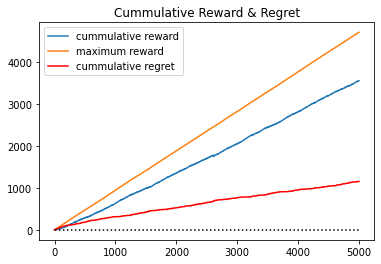

Total reward      : 3556
Total ideal reward: 4713


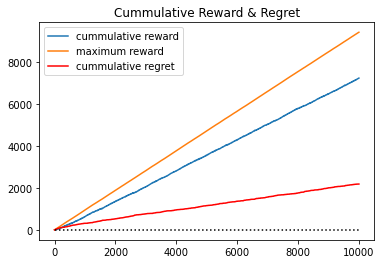

Total reward      : 7231
Total ideal reward: 9415


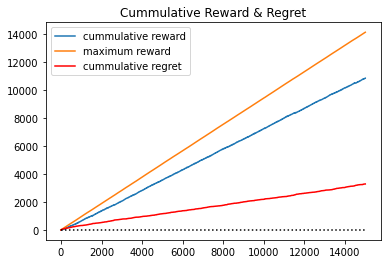

Total reward      : 10835
Total ideal reward: 14114


In [ ]:
modelo_lineal = LinearBandits(n_acciones, n_features,
                              initial_pulls=100)

acciones_ideales = [0,1]


records = iterate_model(modelo_lineal, acciones_ideales,
                        steps=15000, plot_frequency=5000)

El total reward vuelve a ser de crecimiento lienal, debido principalmente a el mayor nº de clientes "cumplidores" frente a los morosos.

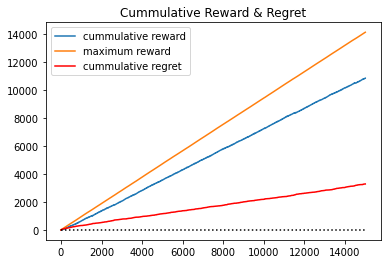

Total reward      : 10835
Total ideal reward: 14114


In [ ]:
show_records(records)

Vemos claramente que con el algoritmo contextual logramos mejorar ligeramente el resultado con respecto al método del primer ejercicio obteniendo un resultado de 0.72 frente a un ideal de 0.94.

Tal como se ve en la gráfica, incluso aumentando el nº de iteraciones, no s lograría mejorar este resultado ya que ha convergido.





Average reward      : 0.7223333333333334
Average ideal reward: 0.9409333333333333


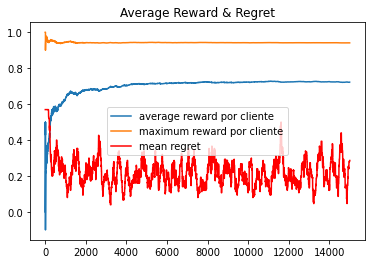

In [ ]:
show_records_avgs(records)